In [65]:
import mysql.connector
from getpass import getpass
import pandas as pd

In [2]:
password = getpass()
cnx = mysql.connector.connect(user = "root",
                             password = password,
                             host = "localhost",
                             database = "sakila")
cnx.is_connected()

········


True

In [3]:
#we need to define the object we will use to  interact with my sql
cursor = cnx.cursor()
query = ("""With top_uxs AS(
SELECT programs.school_id, COUNT(overall_score) AS total_reviews, round(AVG(overall_score),2) as overall_score, round(AVG(curric_score),2) as curric_score, round(AVG(job_score),2) as job_score
FROM bootcamp.comments
inner join bootcamp.programs
on comments.program_id = programs.program_id
where programs.category = "UX/UI Design"
group by programs.school_id
order by overall_score DESC
Limit 10)

SELECT schools.school_name, GROUP_CONCAT(location.city_name SEPARATOR ', ') as cities from top_uxs
inner join bootcamp.location
on top_uxs.school_id = location.school_id
inner join bootcamp.schools
on top_uxs.school_id = schools.school_id
group by top_uxs.school_id;""")
cursor.execute(query)

In [4]:
#getting the result
results = cursor.fetchall()

In [5]:
columns = [header[0] for header in cursor.description]
columns

['school_name', 'cities']

In [9]:
top_ux_locations = pd.DataFrame(results, columns = columns)
top_ux_locations

,school_name,cities
0,beginex,"NYC, Online"
1,designlab,Online
2,design-sprint-school,Online
3,ironhack,"Berlin, Mexico City, Amsterdam, Sao Paulo, Par..."
4,learningfuze,"Irvine, San Diego, Online"
5,springboard,Online
6,udacity,Online
7,ux-design-institute,Online
8,mento-design-academy,Online


In [23]:
query = ("""With top_datas AS(
SELECT programs.school_id, COUNT(overall_score) AS total_reviews, round(AVG(overall_score),2) as overall_score, round(AVG(curric_score),2) as curric_score, round(AVG(job_score),2) as job_score
FROM bootcamp.comments
inner join bootcamp.programs
on comments.program_id = programs.program_id
where programs.category = "data"
group by programs.school_id
order by overall_score DESC
Limit 10)

SELECT schools.school_name, GROUP_CONCAT(location.city_name SEPARATOR ', ') as cities from top_datas
inner join bootcamp.location
on top_datas.school_id = location.school_id
inner join bootcamp.schools
on top_datas.school_id = schools.school_id
group by top_datas.school_id;""")
cursor.execute(query)
results = cursor.fetchall()
columns = [header[0] for header in cursor.description]
top_data = pd.DataFrame(results, columns = columns)
top_data

,school_name,cities
0,dataquest,Online
1,ironhack,"Berlin, Mexico City, Amsterdam, Sao Paulo, Par..."
2,knowledgehut,Online
3,springboard,Online
4,udacity,Online
5,tripleten,Online
6,clarusway,Online
7,ccs-learning-academy,Online
8,maven-analytics,Online
9,syntax-technologies,Online


In [24]:
query = ("""With top_webs AS(
SELECT programs.school_id, COUNT(overall_score) AS total_reviews, round(AVG(overall_score),2) as overall_score, round(AVG(curric_score),2) as curric_score, round(AVG(job_score),2) as job_score
FROM bootcamp.comments
inner join bootcamp.programs
on comments.program_id = programs.program_id
where programs.category = "web development"
group by programs.school_id
order by overall_score DESC
Limit 10)

SELECT schools.school_name, GROUP_CONCAT(location.city_name SEPARATOR ', ') as cities from top_webs
inner join bootcamp.location
on top_webs.school_id = location.school_id
inner join bootcamp.schools
on top_webs.school_id = schools.school_id
group by top_webs.school_id;""")
cursor.execute(query)
results = cursor.fetchall()
columns = [header[0] for header in cursor.description]
top_web = pd.DataFrame(results, columns = columns)
top_web

,school_name,cities
0,actualize,"Chicago, Online"
1,altcademy,Online
2,code-platoon,"Chicago, Online"
3,codesmith,"Los Angeles, NYC, Online, Temporarily Online"
4,ironhack,"Berlin, Mexico City, Amsterdam, Sao Paulo, Par..."
5,knowledgehut,Online
6,tech-elevator,"Cleveland, Columbus, Cincinnati, Pittsburgh, O..."
7,tripleten,Online
8,clarusway,Online
9,ccs-learning-academy,Online


In [57]:
df_all = pd.concat([top_ux_locations, top_data, top_web], axis=0).reset_index()
df_all.drop("index", axis=1, inplace=True)
df_all.drop_duplicates(inplace=True, keep="first")
df_all

,school_name,cities
0,beginex,"NYC, Online"
1,designlab,Online
2,design-sprint-school,Online
3,ironhack,"Berlin, Mexico City, Amsterdam, Sao Paulo, Par..."
4,learningfuze,"Irvine, San Diego, Online"
5,springboard,Online
6,udacity,Online
7,ux-design-institute,Online
8,mento-design-academy,Online
9,dataquest,Online


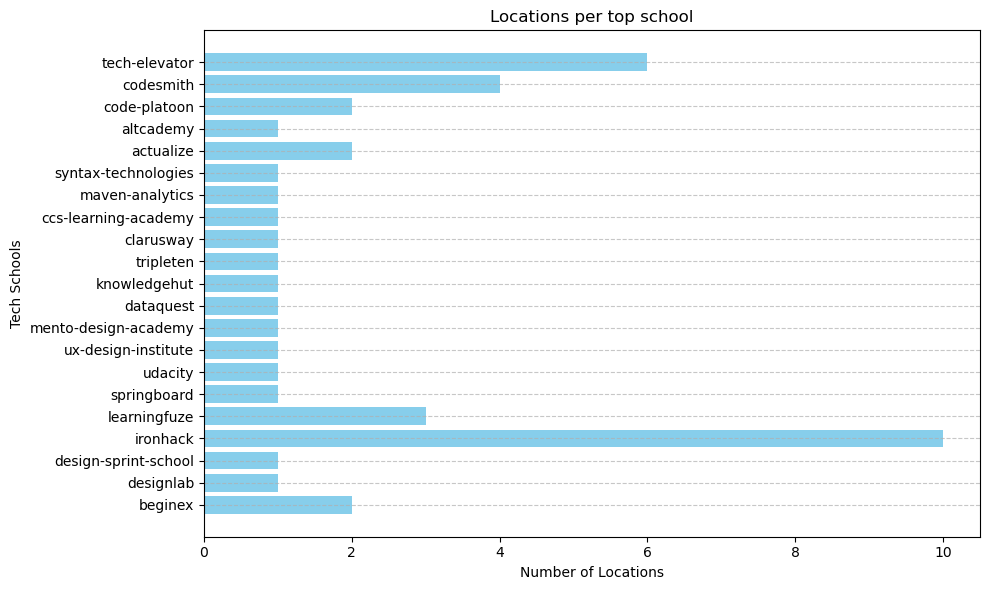

In [64]:
import matplotlib.pyplot as plt
x = df_all["school_name"]
y = df_all["cities"].str.split(",")

plt.figure(figsize=(10, 6))
plt.barh(df_all['school_name'], [len(city) for city in y], color='skyblue')
plt.xlabel('Number of Locations')
plt.ylabel("Tech Schools")
plt.title("Locations per top school")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

## TOP 10

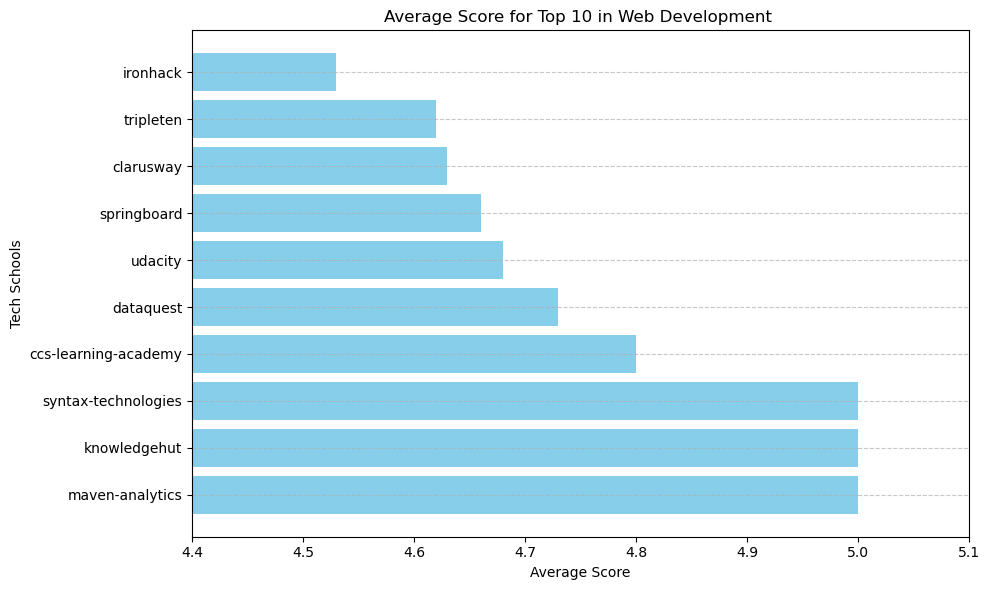

In [81]:
query = ("""With top_webs AS(
SELECT programs.school_id, COUNT(overall_score) AS total_reviews, round(AVG(overall_score),2) as overall_score, round(AVG(curric_score),2) as curric_score, round(AVG(job_score),2) as job_score
FROM bootcamp.comments
inner join bootcamp.programs
on comments.program_id = programs.program_id
where programs.category = "data"
group by programs.school_id
order by overall_score DESC
Limit 10)

SELECT schools.school_name, total_reviews, overall_score, curric_score, job_score from top_webs
inner join bootcamp.schools
on top_webs.school_id = schools.school_id""")
cursor.execute(query)
results = cursor.fetchall()
columns = [header[0] for header in cursor.description]
top10_web = pd.DataFrame(results, columns = columns)

x = top10_web["school_name"]
y = top10_web["overall_score"]

plt.figure(figsize=(10, 6))
plt.barh(x, y, color='skyblue')
plt.xlabel('Average Score')
plt.ylabel("Tech Schools")
plt.title("Average Score for Top 10 in Web Development ")
plt.xticks(rotation=0)
plt.xlim(4.4, 5.1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

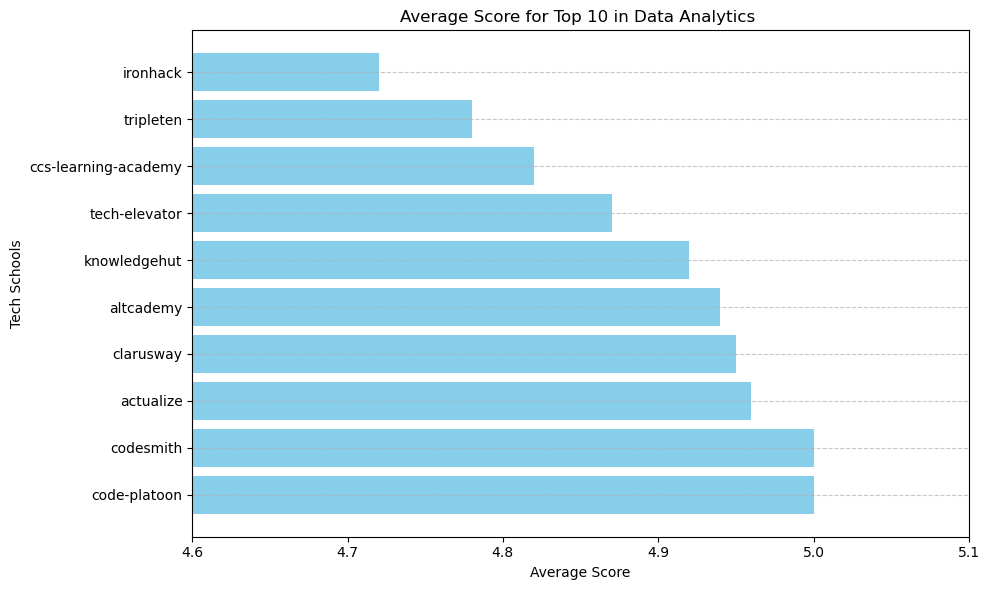

In [80]:
query = ("""With top_datas AS(
SELECT programs.school_id, COUNT(overall_score) AS total_reviews, round(AVG(overall_score),2) as overall_score, round(AVG(curric_score),2) as curric_score, round(AVG(job_score),2) as job_score
FROM bootcamp.comments
inner join bootcamp.programs
on comments.program_id = programs.program_id
where programs.category = "web development"
group by programs.school_id
order by overall_score DESC
Limit 10)

SELECT schools.school_name, total_reviews, overall_score, curric_score, job_score from top_datas
inner join bootcamp.schools
on top_datas.school_id = schools.school_id""")
cursor.execute(query)
results = cursor.fetchall()
columns = [header[0] for header in cursor.description]
top10_data = pd.DataFrame(results, columns = columns)

x = top10_data["school_name"]
y = top10_data["overall_score"]

plt.figure(figsize=(10, 6))
plt.barh(x, y, color='skyblue')
plt.xlabel('Average Score')
plt.ylabel("Tech Schools")
plt.title("Average Score for Top 10 in Data Analytics ")
plt.xticks(rotation=0)
plt.xlim(4.6, 5.1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

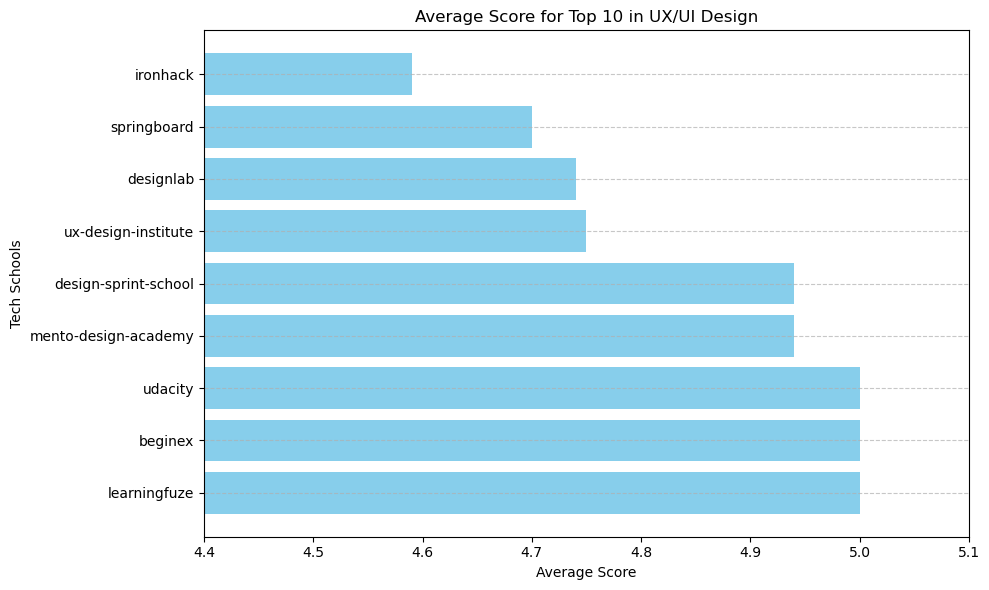

In [79]:
query = ("""With top_uxs AS(
SELECT programs.school_id, COUNT(overall_score) AS total_reviews, round(AVG(overall_score),2) as overall_score, round(AVG(curric_score),2) as curric_score, round(AVG(job_score),2) as job_score
FROM bootcamp.comments
inner join bootcamp.programs
on comments.program_id = programs.program_id
where programs.category = "UX/UI Design"
group by programs.school_id
order by overall_score DESC
Limit 10)

SELECT schools.school_name, total_reviews, overall_score, curric_score, job_score from top_uxs
inner join bootcamp.schools
on top_uxs.school_id = schools.school_id""")
cursor.execute(query)
results = cursor.fetchall()
columns = [header[0] for header in cursor.description]
top10_ux = pd.DataFrame(results, columns = columns)

x = top10_ux["school_name"]
y = top10_ux["overall_score"]

plt.figure(figsize=(10, 6))
plt.barh(x, y, color='skyblue')
plt.xlabel('Average Score')
plt.ylabel("Tech Schools")
plt.title("Average Score for Top 10 in UX/UI Design")
plt.xticks(rotation=0)
plt.xlim(4.4, 5.1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

## Creating New Databases and Tables

In [40]:
query = ("""CREATE DATABASE new_db""")
cursor.execute(query)

In [45]:
query = ("""CREATE TABLE new_db.country 
        (country_id INT NOT NULL PRIMARY KEY,
        country_name VARCHAR(52) NOT NULL);""")
cursor.execute(query)

In [52]:
#create another table 
query = ("""
            CREATE TABLE new_db.students(
            student_id INT PRIMARY KEY,
            student_name VARCHAR(52),
            email VARCHAR(52) DEFAULT 'johndoe@gmail.com',
            coolness INT NOT NULL,
            country_id INT NOT NULL,
            FOREIGN KEY (country_id) REFERENCES country(country_id));""")
cursor.execute(query)

In [55]:
query = ("""INSERT INTO new_db.country(country_id, country_name)
            VALUES (10, "Sweden"),
                    (9, "Portugal")""")
cursor.execute(query)

In [64]:
query = (""" 
            INSERT INTO new_db.students(student_id, student_name, coolness, country_id)
            VALUES (100, "fred", 1, 10),
                    (101, "eusebio",10, 10);""")
cursor.execute(query)

ProgrammingError: 2055: Cursor is not connected

In [59]:
cnx.commit()

In [60]:
cursor.close()

True

In [62]:
cnx.close()

In [68]:
# what about a dataframe?
from sklearn.datasets import load_iris

iris = load_iris()
data = pd.DataFrame(iris["data"], columns = iris["feature_names"])
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [69]:
password = getpass()
cnx = mysql.connector.connect(user = "root",
                             password = password,
                             host = "localhost",
                             database = "sakila")
cnx.is_connected()

········


True

In [71]:
cursor = cnx.cursor()
query = ("""CREATE DATABASE IF NOT EXISTS plants;""")
cursor.execute(query)

In [ ]:
query = ("""CREATE TABLE plants.demo""")